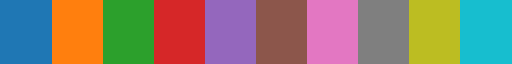

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
cmap = plt.get_cmap('tab10')
cmap

### RunTime

In [3]:
dfs = []
for i, version in enumerate(['v0', 'v1', 'v2']):
    print(f'Loading version: {version}')
    dfs.append(pd.read_csv(f'time_to_score_{version}.csv', names=['time', 'score'], index_col=False))
    dfs[i]['version'] = version
    dfs[i].time = dfs[i].time / (1000 * 3600)  # convert to hours

df = pd.concat(dfs, ignore_index=True)

Loading version: v0
Loading version: v1
Loading version: v2


Text(0.5, 1.0, 'Score Over Time')

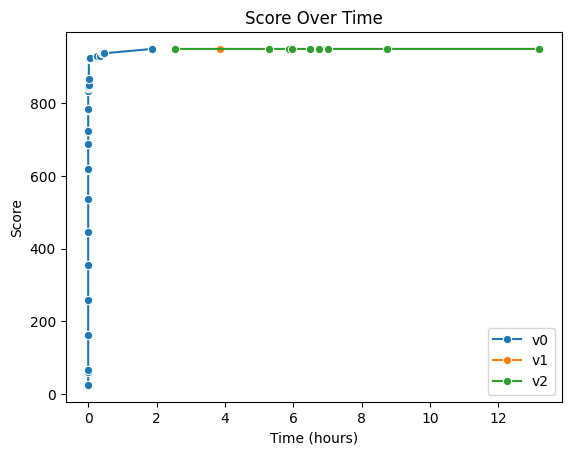

In [4]:
sns.lineplot(data=df, x='time', y='score', hue='version', palette=cmap.colors, marker='o')
# plt.ylim(920, 955)
plt.legend()
plt.xlabel('Time (hours)')
plt.ylabel('Score')
plt.title('Score Over Time')

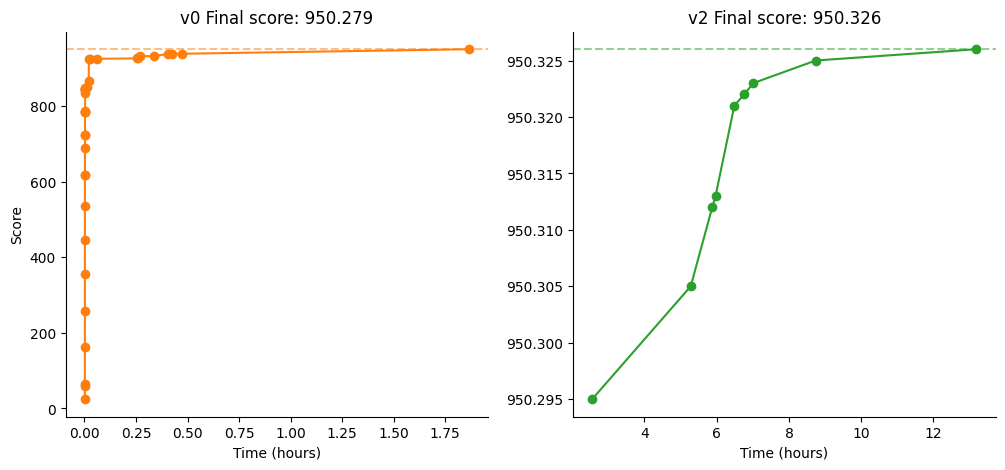

In [5]:
fig, ax = plt.subplots(1,2, figsize=(12, 5), sharey=False)

ax[0].plot(dfs[0].time, dfs[0].score, label='v0', marker='o', color=cmap(1))
ax[0].axhline(y=max(dfs[0].score),  linestyle='--', color=cmap(1), alpha=0.5, ms=5, label=f'Final Score {max(dfs[0].score)}')

ax[1].plot(dfs[2].time, dfs[2].score, label='v2', marker='o', color=cmap(2))
ax[1].axhline(y=max(dfs[2].score),  linestyle='--', color=cmap(2), alpha=0.5, ms=5, label=f'Final Score {max(dfs[2].score)}')

ax[0].set_xlabel('Time (hours)')
ax[1].set_xlabel('Time (hours)')
ax[0].set_ylabel('Score')

ax[0].set_title(f'v0 Final score: {max(dfs[0].score)}')
ax[1].set_title(f'v2 Final score: {max(dfs[2].score)}')

ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

### Density v Size

In [6]:
densities = [1/2**d for d in range(12)]
densities_strings = [f'ind{d}' for d in range(12)]

In [7]:
d_idx = 2
density = densities[d_idx]
density_string = densities_strings[d_idx]

df0 = pd.read_csv(f'density_to_size_{density_string}_v0.csv', names=['size', 'density'], index_col=False)
df1 = pd.read_csv(f'density_to_size_{density_string}_v1.csv', names=['size', 'density'], index_col=False)
df2 = pd.read_csv(f'density_to_size_{density_string}_v2.csv', names=['size', 'density'], index_col=False)
print(f'Loaded density: {density_string} with {len(df0)} points for v0')
print(f'Loaded density: {density_string} with {len(df1)} points for v1')
print(f'Loaded density: {density_string} with {len(df2)} points for v2')

d2_fixed = df2[df2['density'] > density]
print(f'Filtered v2 to {len(d2_fixed)} points for size > {density}')

Loaded density: ind2 with 20971 points for v0
Loaded density: ind2 with 14194 points for v1
Loaded density: ind2 with 2528532 points for v2
Filtered v2 to 9893 points for size > 0.25


array([[<Axes: title={'center': 'size'}>,
        <Axes: title={'center': 'density'}>]], dtype=object)

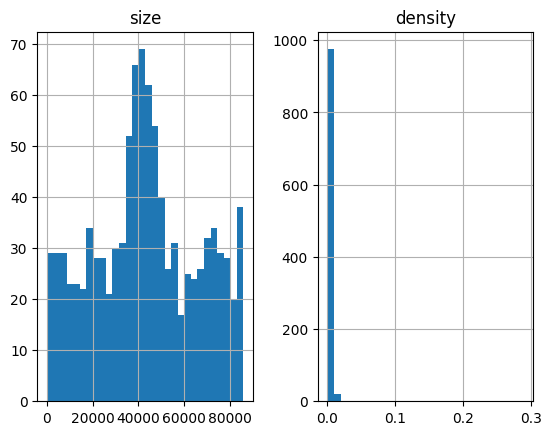

In [8]:
df2.head(1000).hist(bins=30)

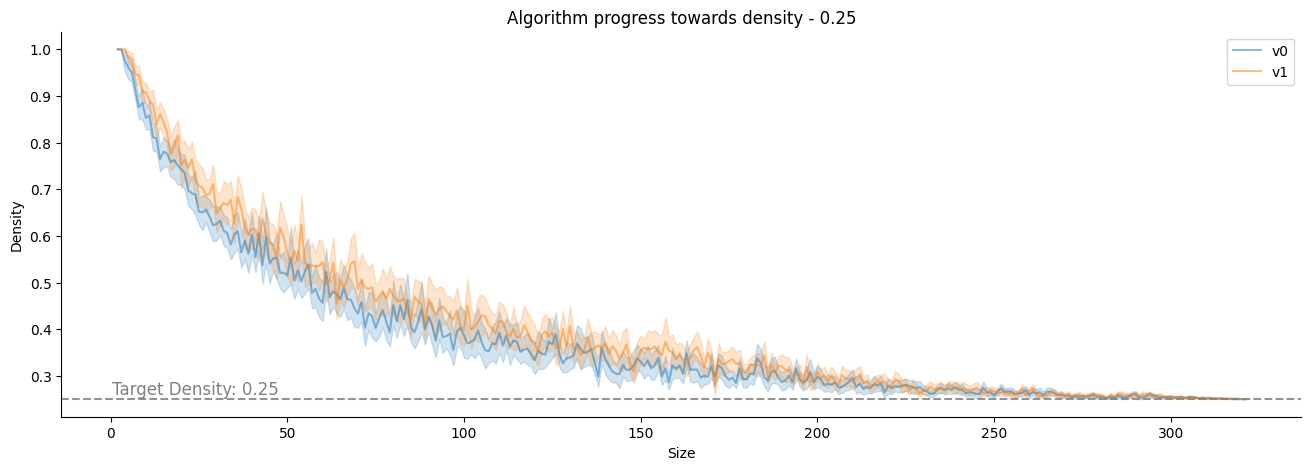

In [9]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.lineplot(data=df0.sample(1000*10, random_state=42), x='size', y='density', ax=ax, alpha=0.5, label=f'v0')
# ax.axvline(x=df0['size'].max(),  linestyle='--', alpha=0.5)

sns.lineplot(data=df1.sample(1000*10, random_state=42), x='size', y='density', ax=ax, alpha=0.5, label=f'v1')
# ax.axvline(x=df1['size'].max(),  linestyle='--', alpha=0.5)


# sns.lineplot(data=d2_fixed, x='size', y='density', ax=ax, alpha=0.5, label=f'v2')
# ax.axvline(x=d2_fixed['size'].max(), linestyle='--', alpha=0.5)


ax.text(0.5, density + 0.01, f'Target Density: {density}', color='gray', fontsize=12)
ax.axhline(y=density, color='gray', linestyle='--', alpha=0.85)
ax.legend(loc='upper right')
ax.set_xlabel('Size')
ax.set_ylabel('Density')
ax.set_title(f'Algorithm progress towards density - {density}')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

### Time v Size - V2 (rand)

In [13]:
df2_time_v_size = pd.read_csv(f'v2_rand/time_to_size_{density_string}.csv', names=['time', 'size'], index_col=False)
df2_time_v_size.time = df2_time_v_size.time / (1000 * 60) # minutes

df2_time_to_density = pd.read_csv(f'v2_rand/time_to_density_{density_string}.csv', names=['time', 'density'], index_col=False)
df2_time_to_density.time = df2_time_to_density.time / (1000 * 60) # minutes

df2_merged = pd.concat([df2_time_v_size.reset_index(drop=True), df2_time_to_density['density'].reset_index(drop=True)], axis=1)

Text(0.003, 0.26, '0.25')

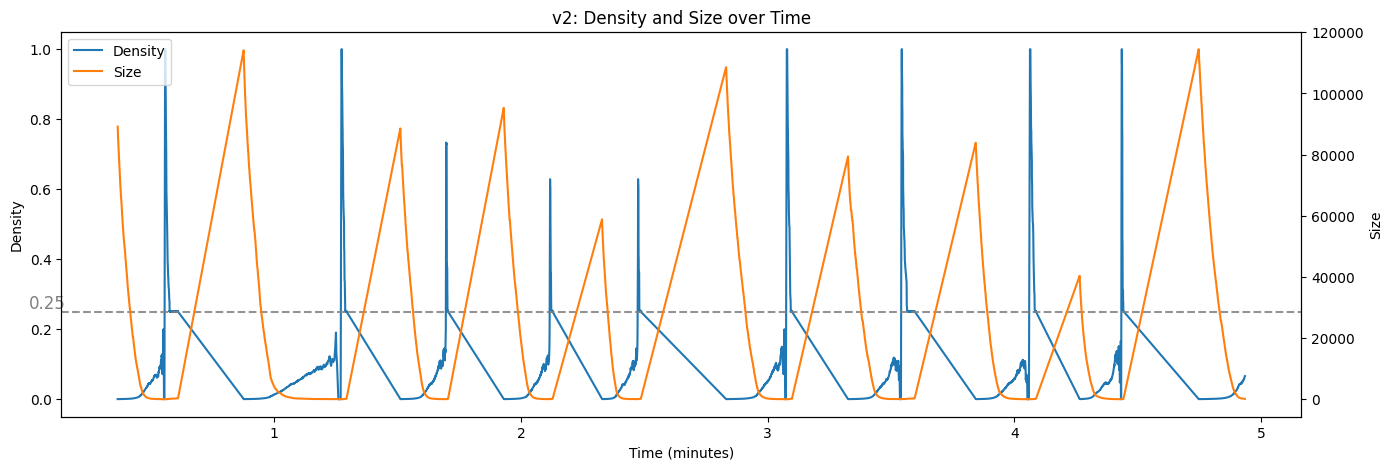

In [15]:
fig, ax = plt.subplots(figsize=(16, 5))

ax2 = ax.twinx()

ax.plot(df2_merged['time'], df2_merged['density'], color=cmap(0), label='Density')
ax2.plot(df2_merged['time'], df2_merged['size'], color=cmap(1), label='Size')

ax.set_xlabel('Time (minutes)')
ax.set_ylabel('Density')
ax2.set_ylabel('Size')
ax.set_title('v2: Density and Size over Time')


lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
# ax.text(0.5, density + 0.01, f'Target Density: {density}', color='gray', fontsize=12)
ax.axhline(y=density, color='gray', linestyle='--', alpha=0.85)

ax.text(0.003, density + 0.01, f'{density}', color='gray', fontsize=12)
